In [175]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import tensorflow_federated as tff

In [176]:
import os
import sys
stderr = sys.stderr
sys.stderr = open(os.devnull, 'w')
import keras
sys.stderr = stderr
    
import tensorflow as tf


from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger

import argparse
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import keras.metrics
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import l2




import numpy, scipy.io
import torch
import torchvision.models as models
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import tensorflow as tf

In [177]:
train = ImageDataGenerator(rescale=1./255,
                          rotation_range=0.2,
                          shear_range=0.2,
                          horizontal_flip=True)
test = ImageDataGenerator(rescale = 1./255,
                          rotation_range=0.2,
                          shear_range=0.2,
                          horizontal_flip=True)
validation = ImageDataGenerator(rescale = 1./255)

In [178]:
train_dataset = train.flow_from_directory('Dataset0.1/training/',
                                         target_size = (256,256),
                                         color_mode='grayscale',
                                         batch_size = 32,
                                         class_mode = 'categorical',
                                         shuffle=False)

test_dataset = train.flow_from_directory('Dataset0.1/testing/',
                                         target_size = (256,256),
                                         color_mode='grayscale',
                                         batch_size = 32,
                                         class_mode = 'categorical',
                                         shuffle=False)

validation_dataset = train.flow_from_directory('Dataset0.1/validation/',
                                         target_size = (256,256),
                                         color_mode='grayscale',
                                         batch_size = 32,
                                         class_mode = 'categorical',
                                         shuffle=False)

Found 3600 images belonging to 4 classes.
Found 60 images belonging to 3 classes.
Found 944 images belonging to 4 classes.


In [179]:
validation_dataset.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2, 'tuberculosis': 3}

In [180]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

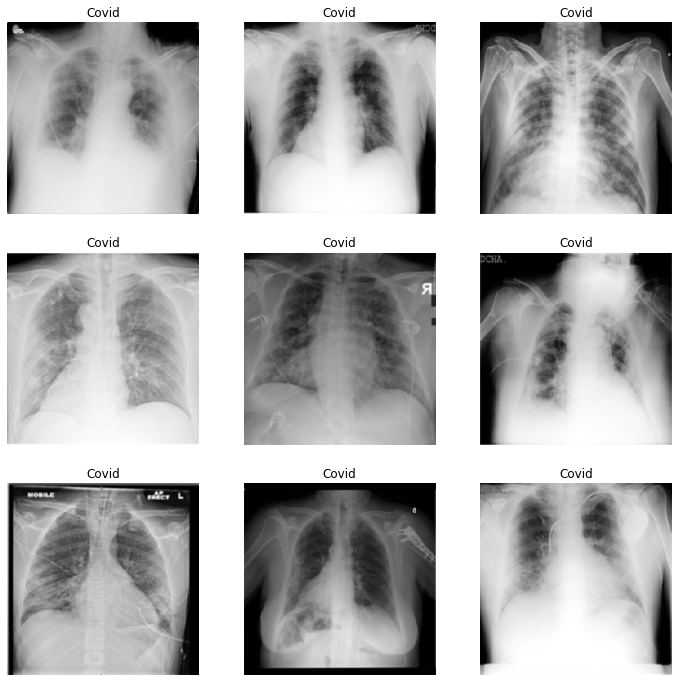

In [181]:
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3,3, i+1)
    img, label = train_dataset.next()
    plt.imshow(img[0], cmap='gray')
    dic = {0:'Covid', 1:'Normal', 2:'Viral Pneumonia' , 3:'tb', 4:'lung_opacity'}
    plt.title(dic.get(np.where(label[0]==1)[0][0]))
    plt.axis('off')
plt.show()

In [182]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', padding='same', input_shape = (256,256,1)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(128,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(256,(3,3),padding='same',activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(128,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(64,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(4,activation = 'softmax')
                                   ])

In [183]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 256)      

In [184]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])

In [185]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 113,
                     epochs = 25,
                     validation_data = validation_dataset)

Epoch 1/25
113/113 [==============================] - 366s 3s/step - loss: 1.9205 - accuracy: 0.3586 - val_loss: 1.3108 - val_accuracy: 0.3708
Epoch 2/25
113/113 [==============================] - 388s 3s/step - loss: 1.2655 - accuracy: 0.5433 - val_loss: 0.8165 - val_accuracy: 0.6367
Epoch 3/25
113/113 [==============================] - 404s 4s/step - loss: 0.8841 - accuracy: 0.6381 - val_loss: 0.7232 - val_accuracy: 0.7055
Epoch 4/25
113/113 [==============================] - 326s 3s/step - loss: 0.7846 - accuracy: 0.6728 - val_loss: 0.8533 - val_accuracy: 0.6621
Epoch 5/25
113/113 [==============================] - 316s 3s/step - loss: 0.6497 - accuracy: 0.7244 - val_loss: 0.9596 - val_accuracy: 0.6822
Epoch 6/25
113/113 [==============================] - 316s 3s/step - loss: 0.5714 - accuracy: 0.7833 - val_loss: 0.4340 - val_accuracy: 0.8305
Epoch 7/25
113/113 [==============================] - 323s 3s/step - loss: 0.4860 - accuracy: 0.8056 - val_loss: 0.3699 - val_accuracy: 0.8549

In [186]:
model.evaluate(validation_dataset)

30/30 [==============================] - 21s 716ms/step - loss: 0.8005 - accuracy: 0.9163


[0.8005168437957764, 0.9163135886192322]

In [187]:
# create history loss and accuracy function
def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(train_loss))

    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_loss, color='b', label='Train')
    plt.plot(epochs, val_loss, color='r', label='Validation')
    plt.legend()
    plt.title('Model Loss')
    
    
    plt.figure(figsize=(8,6))
    plt.plot(epochs, acc, color='b', label='Train')
    plt.plot(epochs, val_acc, color='r', label='Validation')
    plt.legend()
    plt.title('Model Accuracy')
    
    plt.show()

In [188]:
dir_path = 'Dataset1/testing'
for i in os.listdir(dir_path ):
    print(i)

COVID-1001.png
COVID-1002.png
COVID-1003.png
COVID-1004.png
COVID-1005.png
COVID-1006.png
COVID-1007.png
COVID-1008.png
COVID-1009.png
COVID-1010.png
COVID-1011.png
COVID-1012.png
Normal-1001.png
Normal-1002.png
Normal-1003.png
Normal-1004.png
Normal-1005.png
Normal-1006.png
Normal-1007.png
Normal-1008.png
Normal-1009.png
Normal-1010.png
Normal-1011.png
Normal-1012.png
Viral Pneumonia-1001.png
Viral Pneumonia-1002.png
Viral Pneumonia-1003.png
Viral Pneumonia-1004.png
Viral Pneumonia-1005.png
Viral Pneumonia-1006.png
Viral Pneumonia-1007.png
Viral Pneumonia-1008.png
Viral Pneumonia-1009.png
Viral Pneumonia-1010.png
Viral Pneumonia-1011.png
Viral Pneumonia-1012.png


In [189]:
predictions = model.predict(x=validation_dataset, verbose=0)

In [190]:
for i in predictions:
    print(i)

[9.9999964e-01 0.0000000e+00 0.0000000e+00 3.0470090e-07]
[9.9986219e-01 3.3720476e-06 3.0968550e-07 1.3402084e-04]
[1.0000000e+00 2.9769538e-11 1.1834192e-14 3.1120318e-13]
[1.0000000e+00 0.0000000e+00 0.0000000e+00 2.8715474e-31]
[9.9998653e-01 4.6428195e-08 1.0810605e-06 1.2356636e-05]
[2.2937988e-12 7.2860972e-18 8.0430498e-30 1.0000000e+00]
[1.0000000e+00 5.7650392e-15 1.2339123e-15 1.1840980e-08]
[9.9195248e-01 8.0474913e-03 4.1379098e-14 1.1473360e-08]
[3.3647516e-01 6.6352481e-01 3.9355156e-31 3.3451452e-14]
[1.0000000e+00 8.4431946e-17 3.4187937e-12 6.3743594e-11]
[3.0887347e-01 1.0526869e-12 6.9108325e-01 4.3299868e-05]
[1.0000000e+00 4.7978181e-37 0.0000000e+00 4.3956824e-27]
[2.4081524e-01 2.3492032e-13 7.5918484e-01 4.2022327e-12]
[9.9999583e-01 4.2082038e-06 4.8907614e-16 1.5791057e-16]
[1.0000000e+00 5.6713855e-19 1.2966317e-29 3.8766604e-35]
[9.9999976e-01 4.4638284e-13 1.1057383e-15 2.1587334e-07]
[1.0000000e+00 7.4944824e-09 1.1318127e-24 1.0334753e-10]
[9.9999988e-01

In [191]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [192]:
#pred = [1 * (x[0]>=0.5) for x in preds_sigmoid]
#rounded_predictions = [1*(x[0]>=0.5) for x in predictions]

In [193]:
for i in rounded_predictions:
    print(i)

0
0
0
0
0
3
0
0
1
0
2
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
1
0
1
0
1
0
0
0
0
0
0
0
0
2
0
0
2
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
3
1
0
0
1
0
0
0
0
0
3
0
0
0
0
0
3
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
3
0
0
3
0
0
0
0
0
3
0
0
3
0
1
0
0
0
0
0
0
0
2
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
3
0
0
0
0
0
0
0
0
0
1
1
3
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
3
1
1
3
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
3
1
1
1
3
1
1
1
1
0
1
1
1
3
1
3
1
1
1
1
1
1
3
3
1
1
1
3
1
1
1
1
0
0
1
1
1
1
1
1
1
0
1
1
1
1
3
3
1
1
1
1
1
1
3
1
1
1
0
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
3
1
1
1
1
1
3
1
1
1
1
0
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
3
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
0
3
1
1
0
3
1
1
1
3
1
0
1
0
1
1
1
1
1
1
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


Confusion Matrix

In [194]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [195]:
cm = confusion_matrix(y_true=validation_dataset.classes, y_pred=rounded_predictions)

In [196]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[203  12   6  15]
 [ 17 195   0  24]
 [  0   0 235   1]
 [  2   0   1 233]]


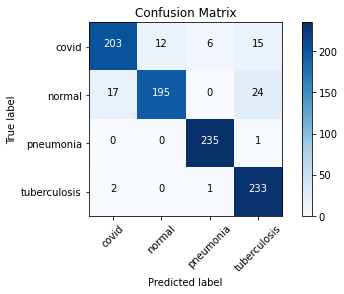

In [197]:
cm_plot_labels = ['covid', 'normal', 'pneumonia', 'tuberculosis']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [198]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [199]:
labels = ['covid', 'normal', 'pneumonia', 'tuberculosis']
report = classification_report(validation_dataset.classes, rounded_predictions, target_names=labels)
print(report)

              precision    recall  f1-score   support

       covid       0.91      0.86      0.89       236
      normal       0.94      0.83      0.88       236
   pneumonia       0.97      1.00      0.98       236
tuberculosis       0.85      0.99      0.92       236

    accuracy                           0.92       944
   macro avg       0.92      0.92      0.92       944
weighted avg       0.92      0.92      0.92       944



In [200]:
model_weight = model.get_weights()
model_weight

[array([[[[ 0.10302605,  0.14669578, -0.04708875, -0.04864781,
            0.03059306,  0.01982606, -0.0096611 ,  0.07729094,
            0.02837152, -0.05171654, -0.01176766,  0.10026409,
           -0.0897721 ,  0.12455802,  0.02951657,  0.07619034,
            0.09247813,  0.01033937, -0.00478148, -0.09692536,
            0.05691075, -0.09203774, -0.01695551, -0.0093728 ,
            0.08551678,  0.12203987,  0.05638445, -0.12211309,
           -0.0668586 , -0.09591867, -0.00394462,  0.07017529]],
 
         [[-0.09618469,  0.12923633,  0.07747249,  0.12799552,
           -0.04489696,  0.085914  , -0.1454989 ,  0.07604275,
            0.10428315,  0.0173414 ,  0.0151963 , -0.03856521,
            0.12738886,  0.10552733,  0.17479028,  0.16369107,
           -0.03668478,  0.11521212, -0.06283896,  0.10082231,
            0.06740069, -0.0060221 , -0.02960454, -0.04676481,
            0.02462063, -0.00952781, -0.03205791,  0.05885207,
            0.03518628,  0.0018822 , -0.04580967, -

In [201]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model3.h5")
print("Saved model to disk")

Saved model to disk


In [202]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model3.h5")
print("Loaded model from disk")

Loaded model from disk


In [203]:
# evaluate loaded model on test data
loaded_model.compile(loss = 'categorical_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])
score = loaded_model.evaluate(validation_dataset)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

30/30 [==============================] - 21s 706ms/step - loss: 0.8122 - accuracy: 0.9142
accuracy: 91.42%


In [204]:
predictions = loaded_model.predict(x=validation_dataset, verbose=0)

In [205]:
for i in predictions:
    print(i)
    
rounded_predictions2 = np.argmax(predictions, axis=-1)
for i in rounded_predictions2:
    print(i)

[1.0000000e+00 0.0000000e+00 0.0000000e+00 1.5338841e-11]
[9.9980313e-01 3.7430286e-06 4.0256703e-07 1.9273766e-04]
[1.0000000e+00 6.5484770e-11 1.4169301e-13 1.7423397e-12]
[1.000000e+00 0.000000e+00 0.000000e+00 7.764506e-33]
[9.9778372e-01 1.6134962e-06 4.2419817e-04 1.7905652e-03]
[7.0925505e-12 1.1605193e-17 2.8098713e-29 1.0000000e+00]
[1.0000000e+00 1.2666968e-14 2.5747466e-15 1.4213187e-08]
[9.6081483e-01 3.9185178e-02 2.2895406e-14 5.2080202e-09]
[6.5056157e-01 3.4943843e-01 1.3923468e-30 7.2470059e-14]
[1.0000000e+00 7.6477493e-17 3.2406788e-12 5.8297929e-11]
[2.5511047e-01 1.1131085e-12 7.4481577e-01 7.3823197e-05]
[1.00000000e+00 1.03014014e-35 0.00000000e+00 5.70819520e-27]
[2.9318681e-01 1.6151533e-13 7.0681310e-01 1.1840613e-12]
[9.9999964e-01 3.1077934e-07 2.6136140e-17 1.8199109e-10]
[1.0000000e+00 3.3514563e-14 2.4386891e-22 1.1340465e-25]
[9.9999976e-01 3.8692275e-13 1.4399996e-15 2.2639844e-07]
[1.0000000e+00 6.9486322e-12 1.9287733e-28 8.6945865e-15]
[9.9999714e-01

In [206]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=validation_dataset.classes, y_pred=rounded_predictions2)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[206  10   5  15]
 [ 17 197   0  22]
 [  0   0 235   1]
 [  5   0   1 230]]


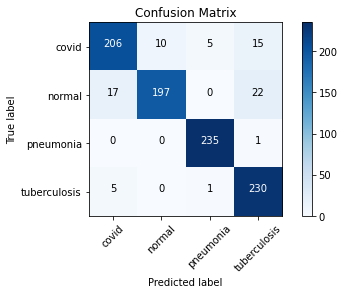

In [207]:
cm_plot_labels = ['covid', 'normal', 'pneumonia', 'tuberculosis']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [208]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

labels = ['covid', 'normal', 'pneumonia', 'tuberculosis']
report = classification_report(validation_dataset.classes, rounded_predictions2, target_names=labels)
print(report)

              precision    recall  f1-score   support

       covid       0.90      0.87      0.89       236
      normal       0.95      0.83      0.89       236
   pneumonia       0.98      1.00      0.99       236
tuberculosis       0.86      0.97      0.91       236

    accuracy                           0.92       944
   macro avg       0.92      0.92      0.92       944
weighted avg       0.92      0.92      0.92       944

